# Social network exploration

This notebook starts from the output generated at step 4 (04_trades_featureEng.ipynb), building and exploring the network of buyers and sellers.

In [1]:
import numpy as np
import pandas as pd 
from network_analysis_exp import *
from network_bond_graph import *
from network_modelling import *
from network_visualization import *
import networkx as nx
import seaborn as sns

from datetime import timedelta

from bokeh.io import show, output_notebook, output_file, save
from matplotlib import pyplot as plt

output_notebook()

Loading BokehJS ...

## Importing data

In [4]:
datafolder = ".."+"/data/"
filename = "02_instrumentsdf_2.pkl"

df = pd.read_pickle(datafolder+filename)

In [6]:
nodes = create_nodes_df(df)

In [7]:
edges = create_edges_df(df, fields=['is_pastdue90', 'is_pastdue180', 'has_impairment1'])

In [36]:
graph, edges, nodes = create_network(edges, nodes, R=0.65, nperlayer=40, nodescircles=0.045)

In [39]:
g_viz = visualize_graph(graph, edges, nodes, plot_h=1200, plot_w=1200, #to_highlight='is_pastdue90',
                       circularLayout=True)

#output_file('graph.html')
#save(g_viz)

show(g_viz)

In [3]:
edge_attr = ['currency', 'invoice_date', 'invoice_amount',
        'is_due', 'due_date',
        'value_date', 'has_purchase']

In [5]:
g = nx.from_pandas_edgelist(df,
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.MultiDiGraph)

In [9]:
g_flat = nx.from_pandas_edgelist(df,
                                 source='debtor_name_1',
                                 target='customer_name_1',
                                 create_using=nx.DiGraph)

In [33]:
pd.DataFrame(list(g_flat.edges), columns=['buyer', 'seller'])

,buyer,seller
0,Sana Hyannis Sarl,Castillo GmbH
1,Isfahan SA,Orpheus Wyandotte Supply LLC
2,Aldrich Chloe GmbH,Orpheus Wyandotte Supply LLC
3,Haddad Corporation,Castillo GmbH
4,Bertram Concatenates S.p.a.,Orpheus Wyandotte Supply LLC
5,Salvatore Krakow Ltd,Castillo GmbH
6,Salvatore Krakow Ltd,Beverly S.p.a.
7,Aberdeen Retards and Phalaropes S.p.a.,Scripps Boa and Enstatites Sarl
8,Aberdeen Retards and Phalaropes S.p.a.,Beverly S.p.a.
9,Haugen Maurice Limited,Scripps Boa and Enstatites Sarl


In [32]:
list(g_flat.edges)[180][0] in list(df.customer_name_1)

False

In [14]:
sorted_components = sorted([(len(component),component) for component in nx.connected_components(g_flat.to_undirected())], key=lambda x: x[0], reverse=True)

In [15]:
giant_component = g.subgraph(nodes=sorted_components[0][1])

In [16]:
giant_component_flat = g_flat.subgraph(nodes=sorted_components[0][1])

In [9]:
df = df[df.debtor_name_1.isin(list(giant_component.nodes)) | df.customer_name_1.isin(list(giant_component.nodes))]

In [10]:
pastdue_col = 'is_pastdue90'
past_due_nodes = df[df[pastdue_col]==True]['debtor_name_1'].unique()

In [11]:
df.head()

,customer_id,customer_name_1,debtor_id,debtor_name_1,invoice_number,invoice_date,due_date,invoice_amount,purchase_amount,purchase_amount_open,...,total_repayment,total_impairment,is_open,we_payment_share,has_purchase,has_deduction,is_due,has_discharge,cash_check,unexpl
uid,,,,,,,,,,,,,,,,,,,,,
2744:79/231,2004008,Castillo GmbH,79,Sana Hyannis Sarl,2744,2013-07-23,2013-08-02,913.70,0.0,0.0,...,0.00,0.00,False,NaN,False,False,True,True,913.70,True
2861:79/232,2004008,Castillo GmbH,79,Sana Hyannis Sarl,2861,2013-07-30,2013-08-09,2233.45,0.0,0.0,...,0.00,0.00,False,NaN,False,False,True,True,2233.45,True
2932:79/233,2004008,Castillo GmbH,79,Sana Hyannis Sarl,2932,2013-08-06,2013-08-16,1370.50,0.0,0.0,...,1370.50,0.00,False,1.0,False,False,True,False,0.00,False
1472:489/688,2004009,Orpheus Wyandotte Supply LLC,489,Isfahan SA,1472,2013-08-13,2013-08-23,9195.10,0.0,0.0,...,0.00,0.00,False,NaN,False,False,True,True,9195.10,True
2042:512/645,2004009,Orpheus Wyandotte Supply LLC,512,Aldrich Chloe GmbH,2042,2013-08-13,2013-08-23,4594.60,0.0,0.0,...,164.35,164.35,False,1.0,False,False,True,True,4265.90,True


In [12]:
 first_invoice_date = df['invoice_date'].min()
last_invoice_date = df['invoice_date'].max()
print('{0} - {1}'.format(first_invoice_date,last_invoice_date))

2013-07-23 00:00:00 - 2018-12-18 00:00:00


In [13]:
 num_days = (last_invoice_date-first_invoice_date).days

In [14]:
days_linspace = reversed(np.linspace(start=num_days, stop=0,num=100,endpoint=False, dtype=int))

In [15]:
dates_linspace = [first_invoice_date + timedelta(days=int(x)) for x in days_linspace]

In [16]:
def get_time_window(row):
    return dates_linspace[np.argmax([row['invoice_date'] <= date for date in dates_linspace])]

In [17]:
df['invoice_date_window'] = df.apply(get_time_window,axis=1)

In [18]:
 debtors = df['debtor_name_1'].unique()

## Network evolution

In [19]:
 num_nodes_window = [nx.from_pandas_edgelist(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.Graph).number_of_nodes() for date_index, date in enumerate(dates_linspace[1:])]

In [20]:
num_debtor_window = [len(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].debtor_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [21]:
num_customer_window = [len(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].customer_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [22]:
cum_num_nodes_window = [nx.from_pandas_edgelist(df[(df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.Graph).number_of_nodes() for date_index, date in enumerate(dates_linspace[1:])]

In [23]:
cum_num_debtor_window = [len(df[(df.invoice_date<date)].debtor_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [24]:
cum_num_customer_window = [len(df[(df.invoice_date<date)].customer_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [25]:
num_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [26]:
num_pastdue90_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df[pastdue_col]==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [27]:
num_pastdue180_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df['is_pastdue180']==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [28]:
num_impairment_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df['has_impairment1']==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


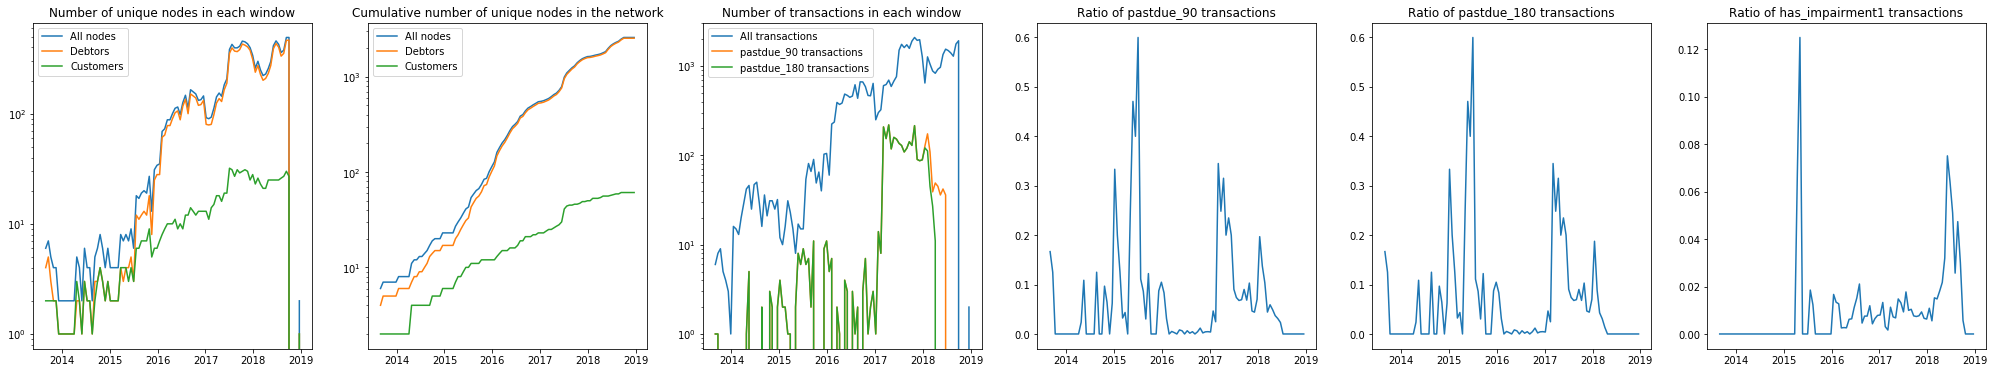

In [34]:
fig,axes = plt.subplots(1, 6, figsize=(35,6))
axes[0].plot(dates_linspace[1:], num_nodes_window, label='All nodes')
axes[0].plot(dates_linspace[1:], num_debtor_window, label='Debtors')
axes[0].plot(dates_linspace[1:], num_customer_window, label='Customers')
axes[0].legend()
axes[0].set_yscale("log", nonposy='clip')
axes[0].set_title('Number of unique nodes in each window')
axes[1].plot(dates_linspace[1:], cum_num_nodes_window, label='All nodes')
axes[1].plot(dates_linspace[1:], cum_num_debtor_window, label='Debtors')
axes[1].plot(dates_linspace[1:], cum_num_customer_window, label='Customers')
axes[1].set_yscale("log", nonposy='clip')
axes[1].legend()
axes[1].set_title('Cumulative number of unique nodes in the network')
axes[2].plot(dates_linspace[1:], num_transations_window, label='All transactions')
axes[2].plot(dates_linspace[1:], num_pastdue90_transations_window, label='pastdue_90 transactions')
axes[2].plot(dates_linspace[1:], num_pastdue180_transations_window, label='pastdue_180 transactions')
axes[2].legend()
axes[2].set_yscale("log", nonposy='clip')
axes[2].set_title('Number of transactions in each window')
axes[3].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_pastdue90_transations_window,num_transations_window)))
axes[3].set_title('Ratio of pastdue_90 transactions')
axes[4].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_pastdue180_transations_window,num_transations_window)))
axes[4].set_title('Ratio of pastdue_180 transactions')
axes[5].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_impairment_transations_window,num_transations_window)))
axes[5].set_title('Ratio of has_impairment1 transactions')
plt.show()

In [35]:
print('Number of nodes beeing debtor and customer simultanously -',len(np.intersect1d(df.debtor_name_1.unique(),df.customer_name_1.unique())))

Number of nodes beeing debtor and customer simultanously - 14


## Transaction amounts in time

In [36]:
group_invoice_date_window = df.groupby(by=['debtor_name_1','invoice_date_window']).sum()['invoice_amount']

In [37]:
 flow_array = np.empty([len(debtors),len(dates_linspace)])
for debtor_key, debtor in enumerate(debtors):
    for time_window_key, time_window in enumerate(dates_linspace):
        try:
            flow_array[debtor_key, time_window_key] = group_invoice_date_window.loc[debtor].loc[time_window]
        except:
            flow_array[debtor_key, time_window_key] = 0

In [38]:
 row_max = flow_array.max(axis=1)
flow_array = flow_array / row_max[:, np.newaxis]

Text(0.5,1,'All debtors')

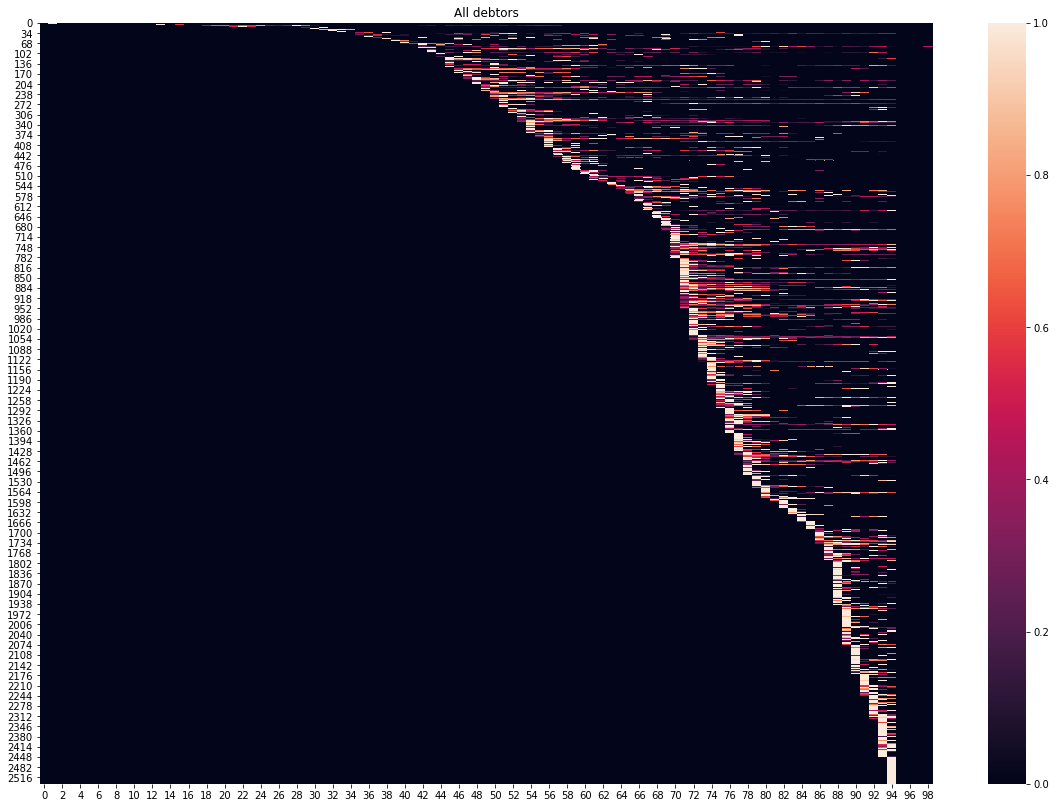

In [39]:
plt.figure(figsize=(20,14))
sns.heatmap(flow_array)
plt.title('All debtors')

In [40]:
print("Debotrs on Y-axis, time-windows on X-axis (approx 2.5 week). Normalised per row. black is no transactions. white - maximum sum-value per debtor")

Debotrs on Y-axis, time-windows on X-axis (approx 2.5 week). Normalised per row. black is no transactions. white - maximum sum-value per debtor


In [41]:
 y = np.bincount(np.where(flow_array!=0)[0])

In [42]:
 y = y-1

In [43]:
 ii = np.nonzero(y)[0]

Text(0.5,1,'Debotrs with more than 1 time-window with transactions')

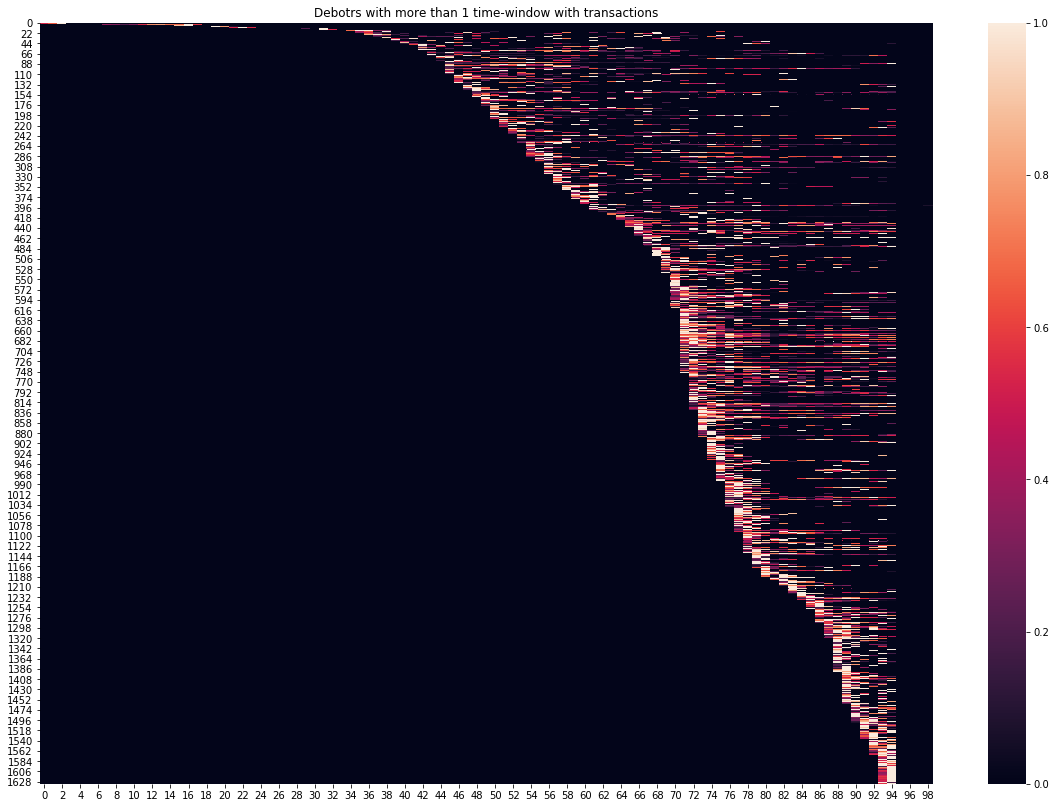

In [44]:
 plt.figure(figsize=(20,14))
sns.heatmap(flow_array[ii,:])
plt.title('Debotrs with more than 1 time-window with transactions')

## Pastdue90 transactions over time

In [46]:
df['invoice_amount_pastdue90'] = df.apply(lambda row: row['invoice_amount'] if row[pastdue_col] else 0, axis=1)

In [47]:
group_invoice_date_window_pastdue_90 = df.groupby(by=['debtor_name_1','invoice_date_window']).sum()['invoice_amount_pastdue90']

In [48]:
flow_array_pastdue_90 = np.empty([len(np.intersect1d(debtors,past_due_nodes)),len(dates_linspace)])
for debtor_key, debtor in enumerate(np.intersect1d(debtors,past_due_nodes)):
    for time_window_key, time_window in enumerate(dates_linspace):
        try:
            flow_array_pastdue_90[debtor_key, time_window_key] = group_invoice_date_window_pastdue_90.loc[debtor].loc[time_window]
        except:
            flow_array_pastdue_90[debtor_key, time_window_key] = 0

In [49]:
row_max = flow_array_pastdue_90.max(axis=1)
row_max[row_max==0]=1
flow_array_pastdue_90 = flow_array_pastdue_90 / row_max[:, np.newaxis]

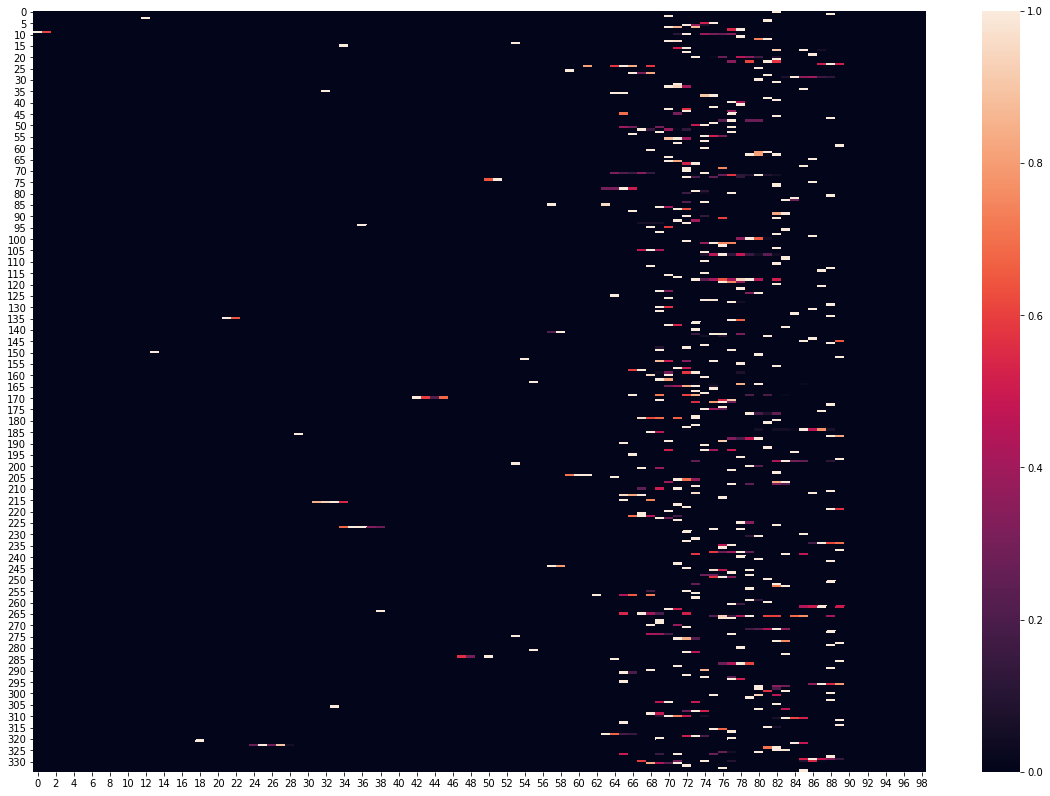

In [50]:
plt.figure(figsize=(20,14))
sns.heatmap(flow_array_pastdue_90)

## Degree in time

In [51]:
 list_degree = []

In [52]:
 for date_index, date in enumerate(dates_linspace[1:]):
    network = nx.from_pandas_edgelist(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.MultiDiGraph)
    for node in giant_component.nodes:
        list_degree.append({'degree':network.out_degree(node) if network.has_node(node) else 0,
                           'date':date})

In [53]:
df_degree = pd.DataFrame.from_records(list_degree)

In [54]:
 df_degree_clean = df_degree[df_degree.date.isin(df.invoice_date_window)]

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


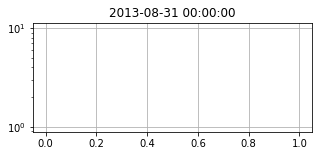

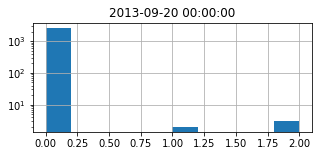

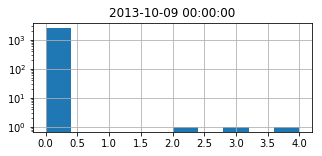

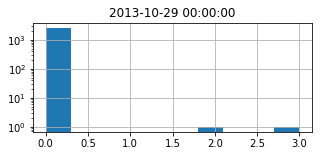

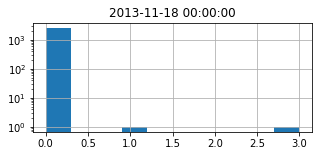

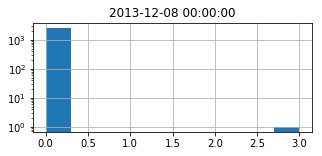

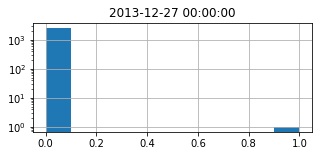

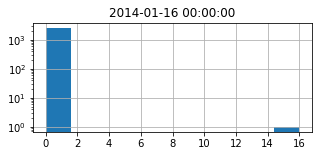

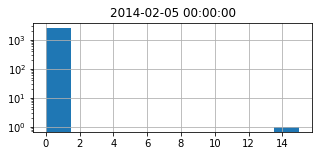

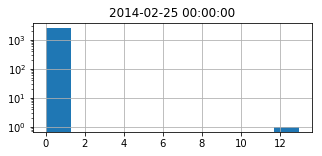

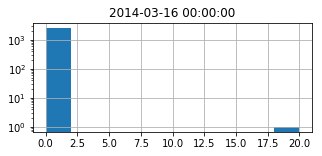

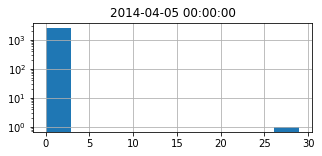

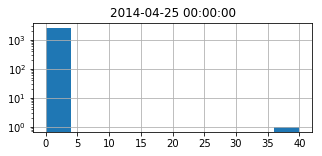

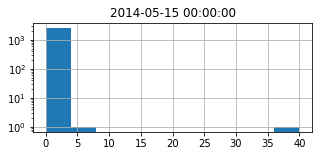

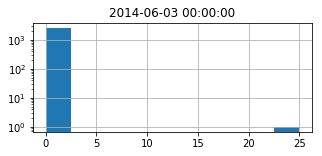

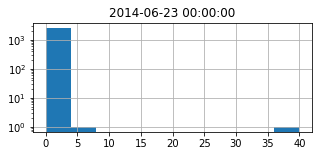

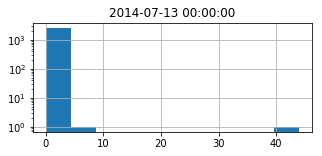

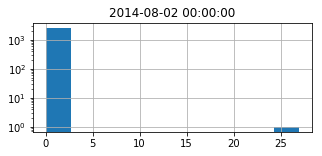

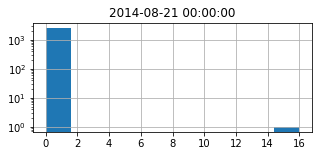

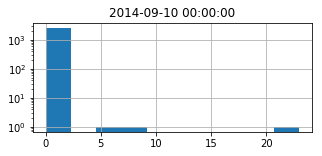

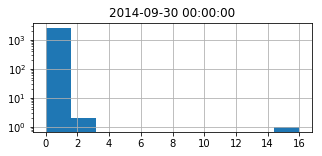

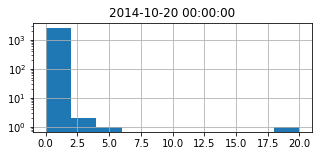

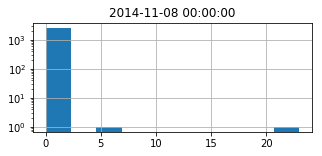

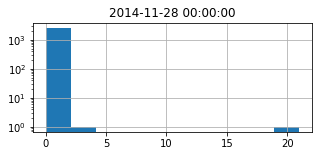

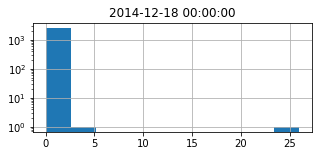

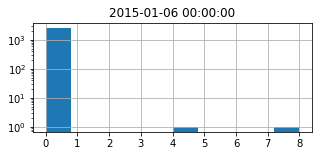

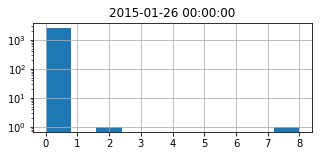

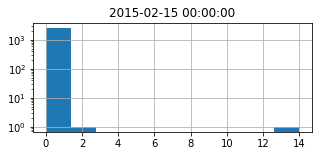

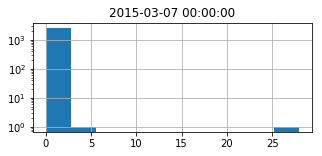

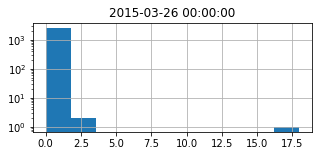

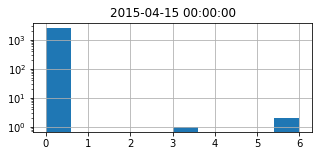

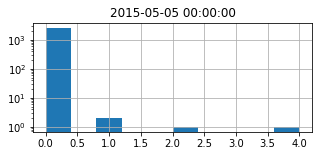

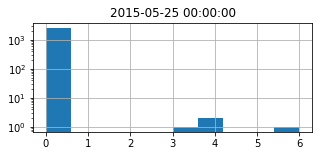

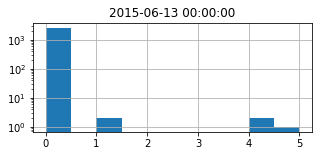

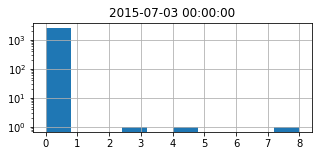

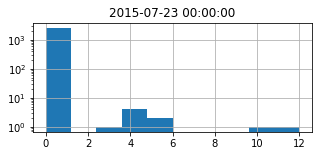

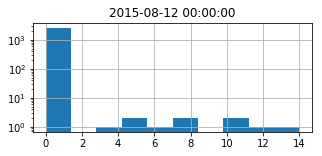

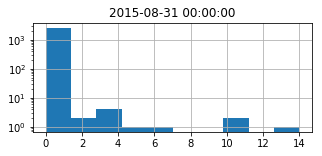

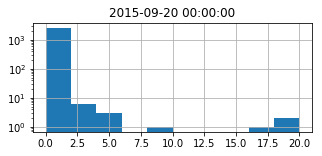

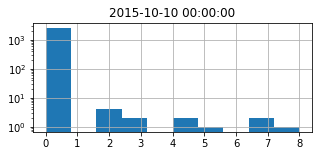

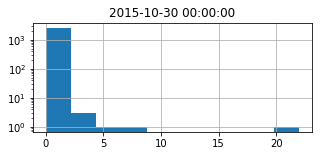

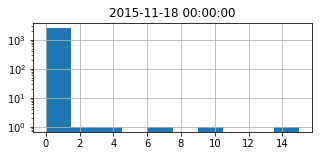

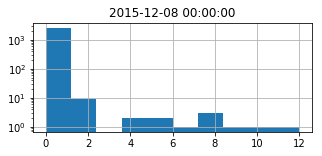

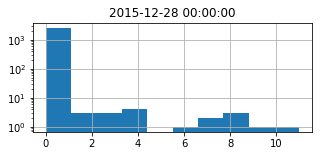

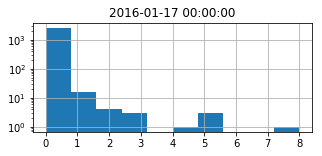

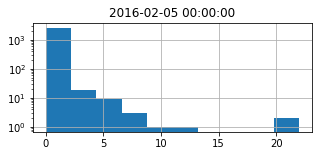

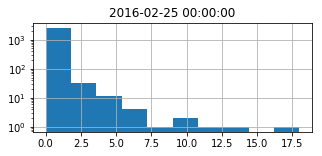

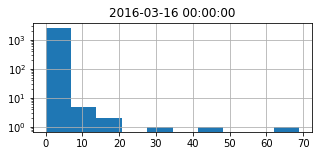

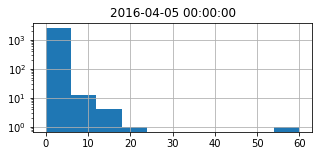

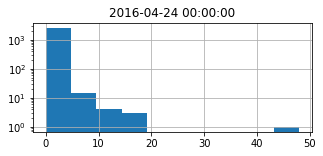

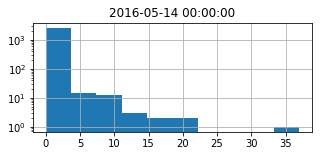

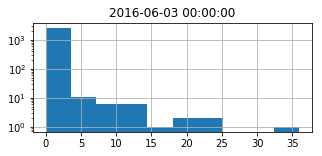

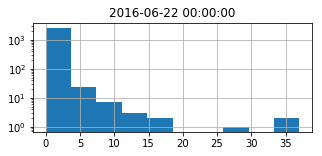

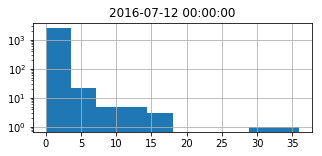

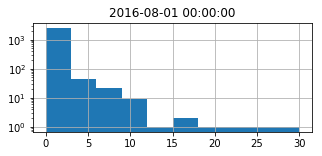

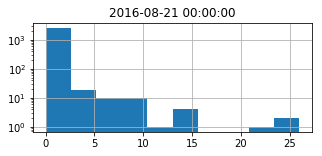

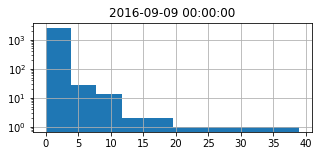

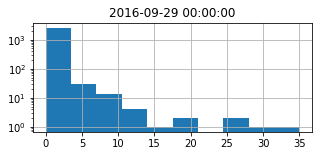

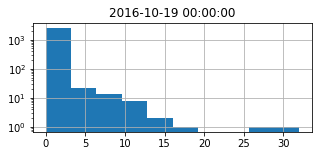

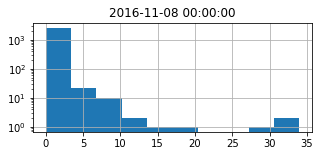

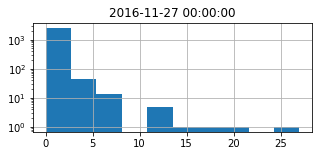

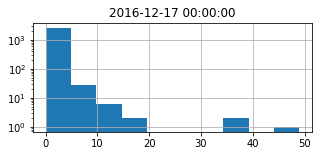

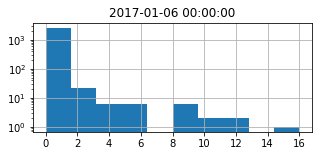

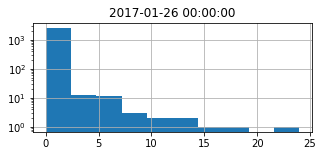

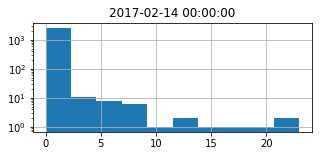

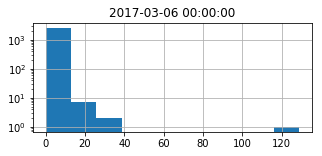

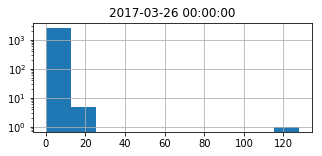

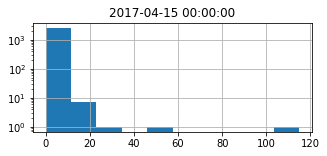

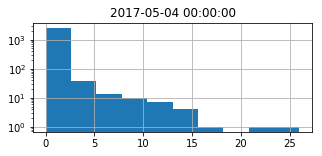

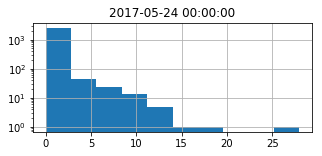

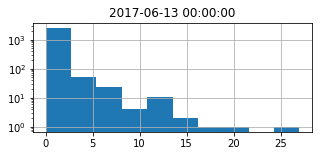

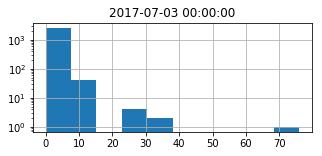

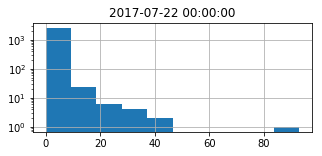

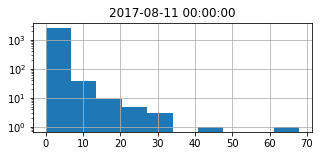

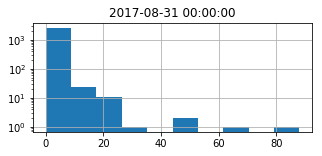

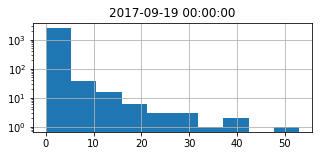

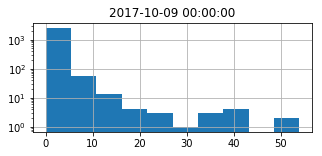

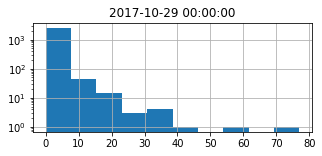

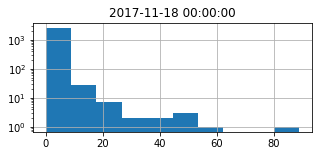

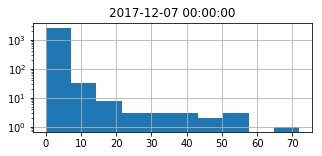

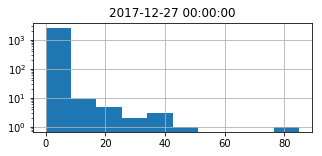

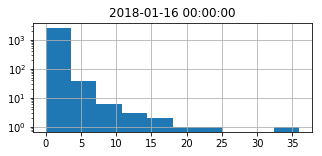

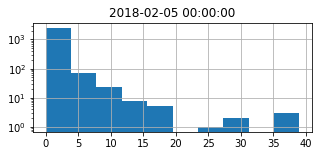

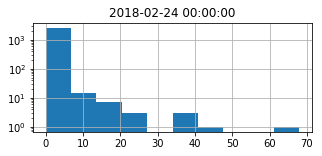

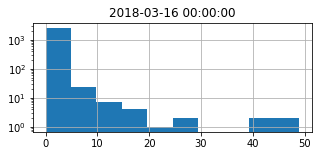

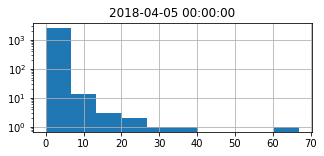

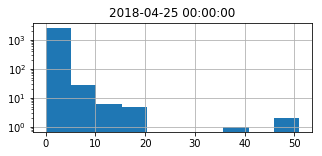

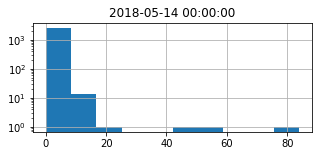

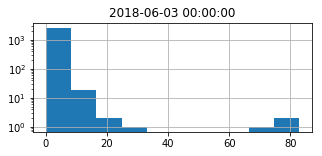

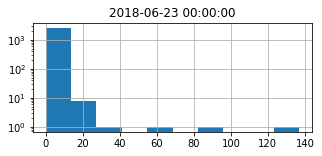

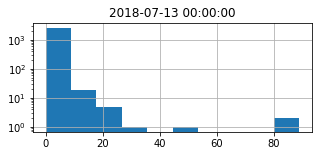

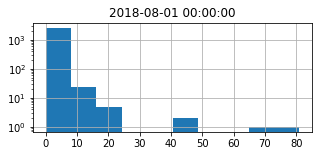

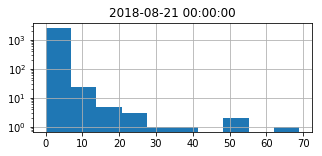

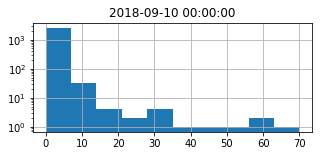

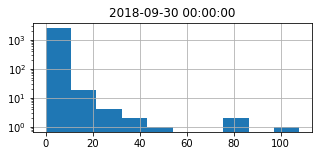

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


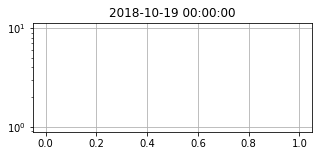

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


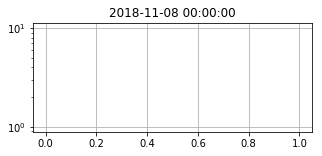

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


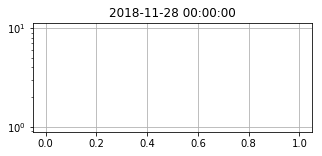

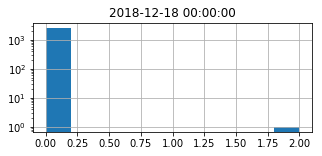

In [55]:
for date in dates_linspace:
    plt.figure(figsize=(5,2))
    df_degree_clean[df_degree_clean.date==date]['degree'].hist(bins=10, log=True)
    plt.title(date)
    plt.show()

In [56]:
print("Again non-stationarity in network flows distribution; saturated time-windows with power-law like distribution")

Again non-stationarity in network flows distribution; saturated time-windows with power-law like distribution


In [57]:
 df_degree_gr = df_degree.groupby('date').agg([('max',max),
                              ('average',np.mean),
                              ('std',np.std),
                              ('count',lambda value: sum(value>0))])

In [58]:
df_degree_gr = df_degree_gr.reset_index()

In [59]:
list_degree_gr = []
for row in df_degree_gr.itertuples():
    list_degree_gr.append({'date':row[1],
                          'max':row[2],
                          'average':row[3],
                          'std':row[4],
                          'count':row[5]})
df_degree_gr_new = pd.DataFrame.from_records(list_degree_gr)
df_degree_gr_new = df_degree_gr_new[['date','max','average','std','count']]

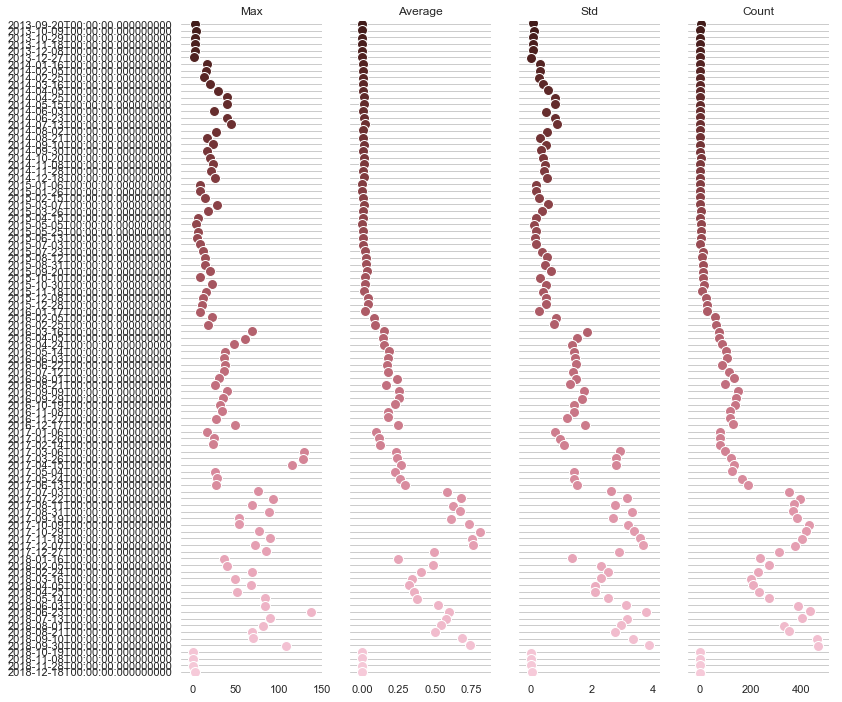

In [60]:
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(df_degree_gr_new,
                 x_vars=df_degree_gr_new.columns[1:], y_vars=["date"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Max",
         "Average",
         "Std",
         'Count']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)